In [15]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn


seaborn.set(context="notebook", style="darkgrid", font="timesnewroman")
seaborn.set_style({"font.family": "serif", "font.serif": "timesnewroman"})
plt.rcParams["mathtext.fontset"] = "stix"
plt.rcParams["figure.figsize"] = (8, 6)
plt.rcParams["text.usetex"] = True
plt.rcParams[
    "text.latex.preamble"
] = r"\usepackage{amssymb} \usepackage{amsmath} \usepackage[T1]{fontenc}"


import numpy as np
import scipy
from scipy.signal import convolve
import emcee
import corner
import h5py
import sys
import pandas as pd
from ssptools import evolve_mf_3 as emf3
from limepy import limepy
from tqdm.auto import tqdm
from corner import corner

In [5]:
filename = "../mcmc_runs/47_tuc_binaries/NGC0104_sampler.hdf"

In [6]:
reader = emcee.backends.HDFBackend(filename, read_only=True)

In [7]:
len(reader.get_chain()[:, :])

2500

In [8]:
walkers, ndim = reader.shape

In [9]:
walkers

512

[]

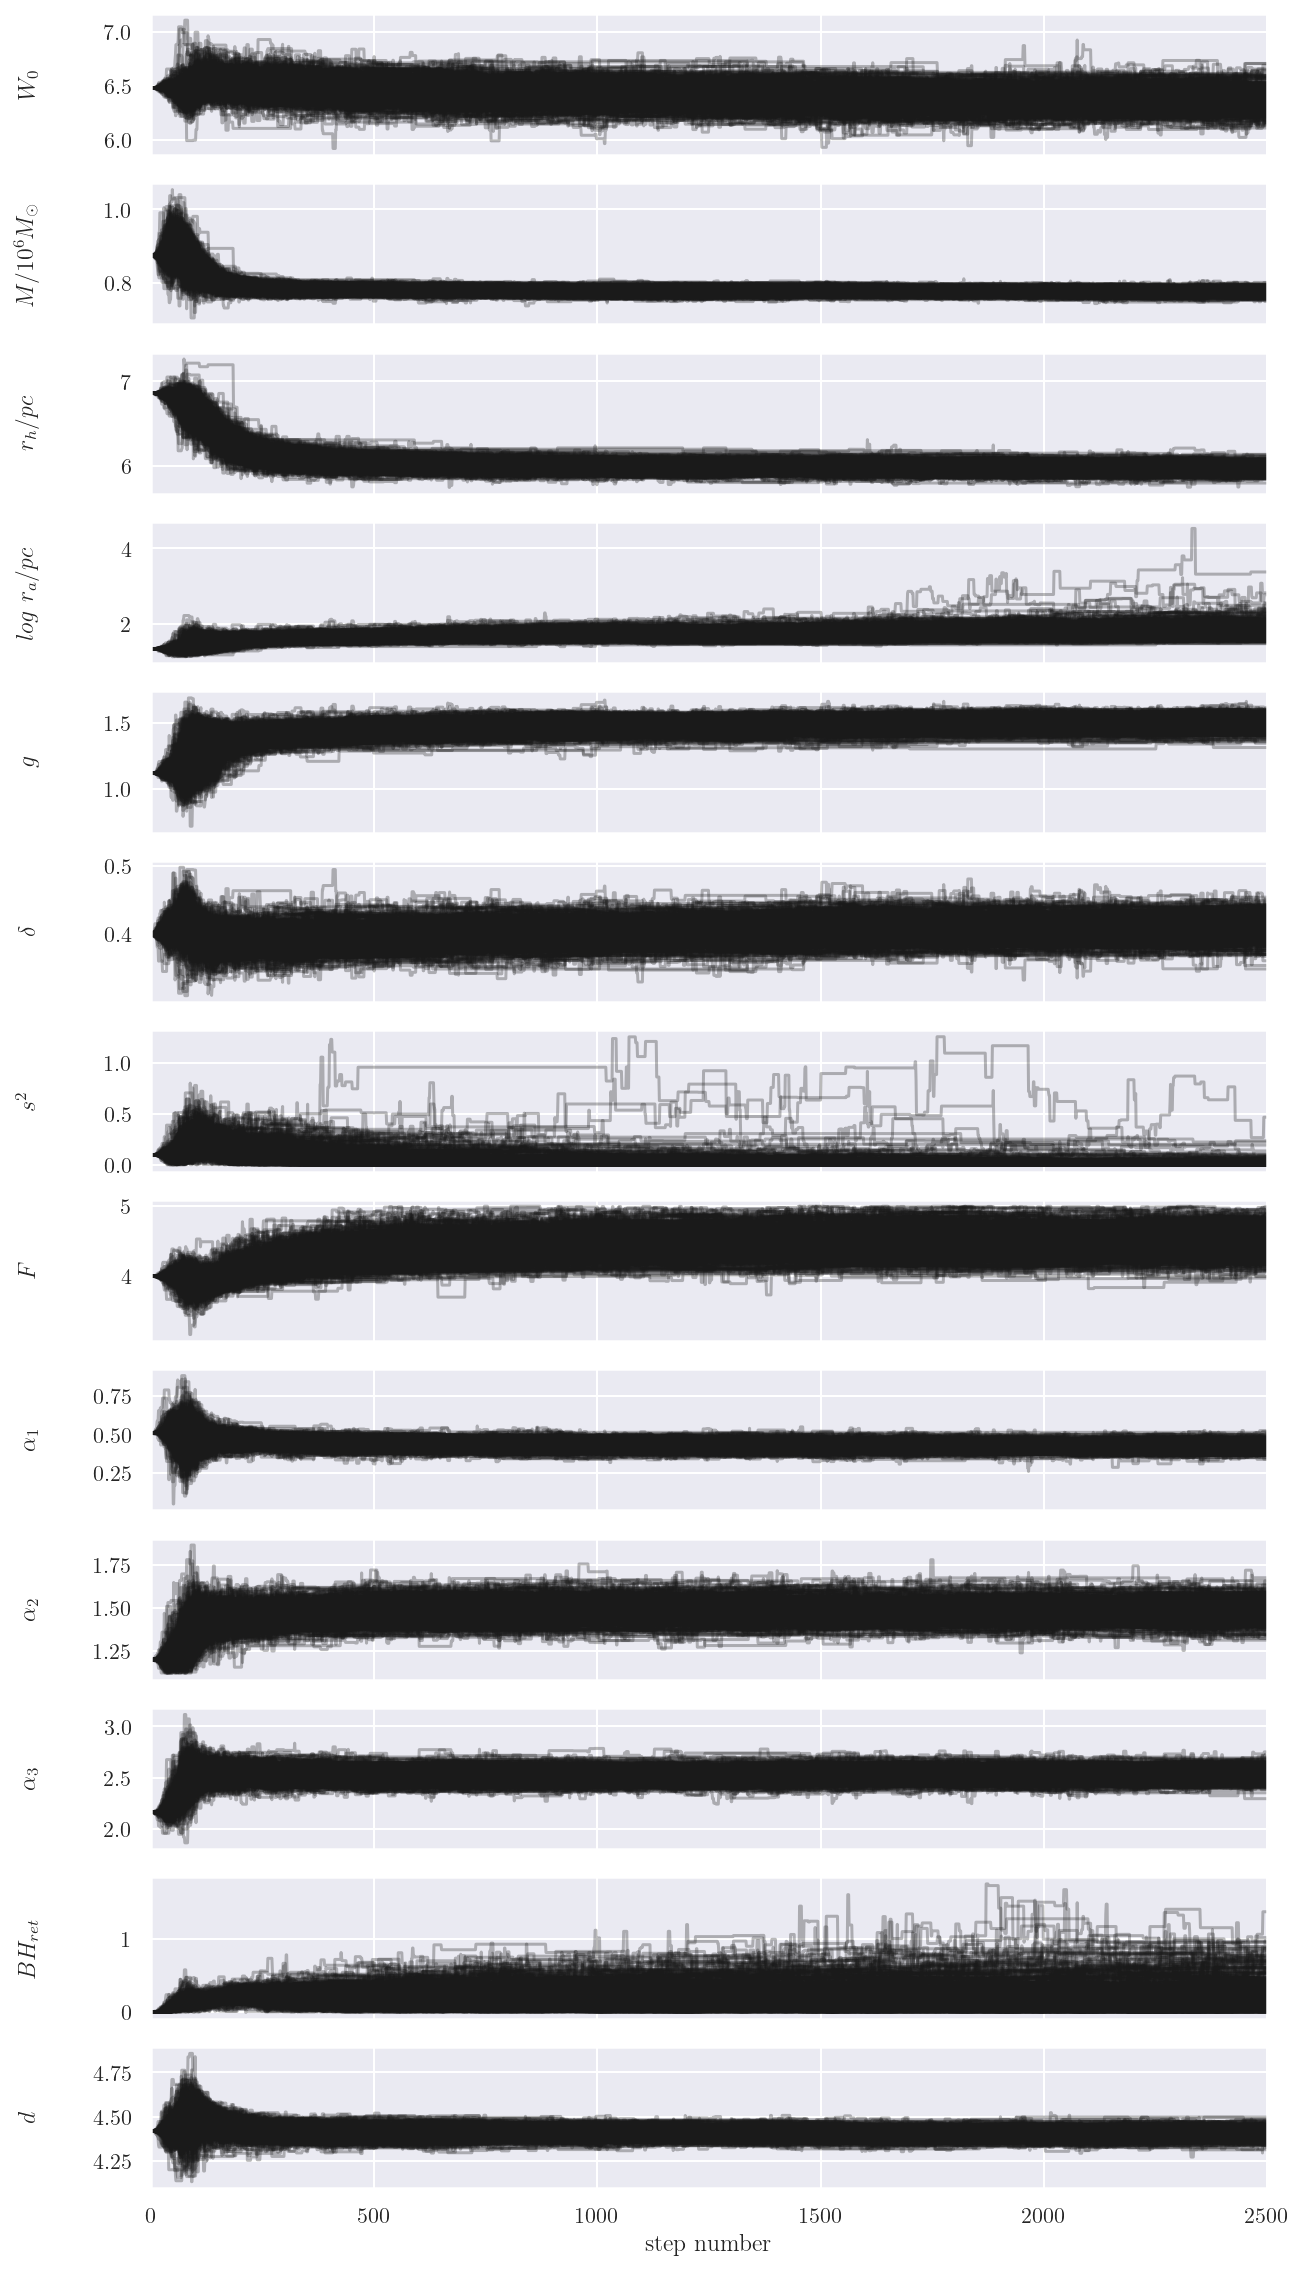

In [10]:
fig, axes = plt.subplots(ndim, figsize=(10, 20), sharex=True)
samples = reader.get_chain()
labels = [
    r"$W_{0}$",
    r"$M/10^6 M_{\odot}$",
    r"$r_h / pc$",
    r"$ log \ r_a / pc$",
    r"$g$",
    r"$\delta$",
    r"$s^2$",
    r"$F$",
    r"$\alpha_1$",
    r"$\alpha_2$",
    r"$\alpha_3$",
    r"$BH_{ret}$",
    r"$d$",
    r"$v_{esc}$",
]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number", fontname="serif")
plt.plot()

In [11]:
try:
    tau = reader.get_autocorr_time()
    print(tau)
except Exception:
    print("WARN: Might not be accurate")
    tau = reader.get_autocorr_time(quiet=True)
    print(tau)

WARN: Might not be accurate


The chain is shorter than 50 times the integrated autocorrelation time for 13 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 50;
tau: [245.22258095 183.7310479  236.73694327 276.78072878 252.7838577
 220.09309288 245.06743607 265.32700918 218.98816918 194.03072251
 155.38970813 219.10635934 203.31317361]


[245.22258095 183.7310479  236.73694327 276.78072878 252.7838577
 220.09309288 245.06743607 265.32700918 218.98816918 194.03072251
 155.38970813 219.10635934 203.31317361]


In [12]:
reader.get_log_prob()

array([[-3489.96091594, -3491.27699388, -3491.13588957, ...,
        -3494.73013438, -3491.18108867, -3490.24092967],
       [-3488.23483701, -3491.18615663, -3488.93615364, ...,
        -3494.73013438, -3491.18108867, -3490.24092967],
       [-3484.76948868, -3491.17506673, -3488.93615364, ...,
        -3494.73013438, -3486.97769259, -3489.13273233],
       ...,
       [-2022.26976263, -2024.35827201, -2031.44694761, ...,
        -2021.68856637, -2023.97095222, -2031.75364799],
       [-2022.26976263, -2024.35827201, -2031.44694761, ...,
        -2021.68856637, -2023.97095222, -2031.75364799],
       [-2022.26976263, -2024.35827201, -2031.44694761, ...,
        -2021.68856637, -2023.97095222, -2031.75364799]])

In [13]:
reader.get_blobs()

array([[(-272.3847724 , -384.06053602, -54.16481771, -526.11454669, -311.46849343, -474.67238954, -550.4366447 , -2125.24577201, 35.47994316, 233.34776304, 974.51647757, -15.65542152, -3.08201397),
        (-273.08665491, -383.32308999, -54.1699558 , -526.23181551, -311.46319667, -474.5673449 , -550.93211686, -2125.95216469, 35.28380405, 233.386136  , 974.58507723, -15.71802504, -3.07058248),
        (-272.64995819, -386.6405489 , -54.16300164, -524.49584973, -311.4795558 , -474.62424713, -549.83311352, -2125.77133302, 35.30702857, 233.37113329, 974.63911359, -15.68070258, -3.10399433),
        ...,
        (-272.7818125 , -383.66871502, -54.16812487, -526.13348241, -311.42555814, -474.70283635, -551.59120316, -2128.85109618, 35.31474416, 233.25455797, 974.50710032, -15.53597017, -2.93550619),
        (-272.75064055, -385.69635851, -54.1718807 , -524.91941686, -311.41688273, -474.57563116, -551.78402811, -2124.53876265, 35.44890416, 233.39097046, 974.61190651, -15.70686106, -3.06578709

In [14]:
for p in samples[-1][-1]:
    print(p)
    

6.132336746243856
0.7817399288889095
5.956700274011035
1.9345841530144257
1.6050253733247803
0.45000040821911086
0.002830420471653456
4.923961885849586
0.4398844933036721
1.3661388836063837
2.5614105567845478
0.1269891505483589
4.445095517340313


In [19]:
samples_flat = reader.get_chain(flat=True,discard=1500)

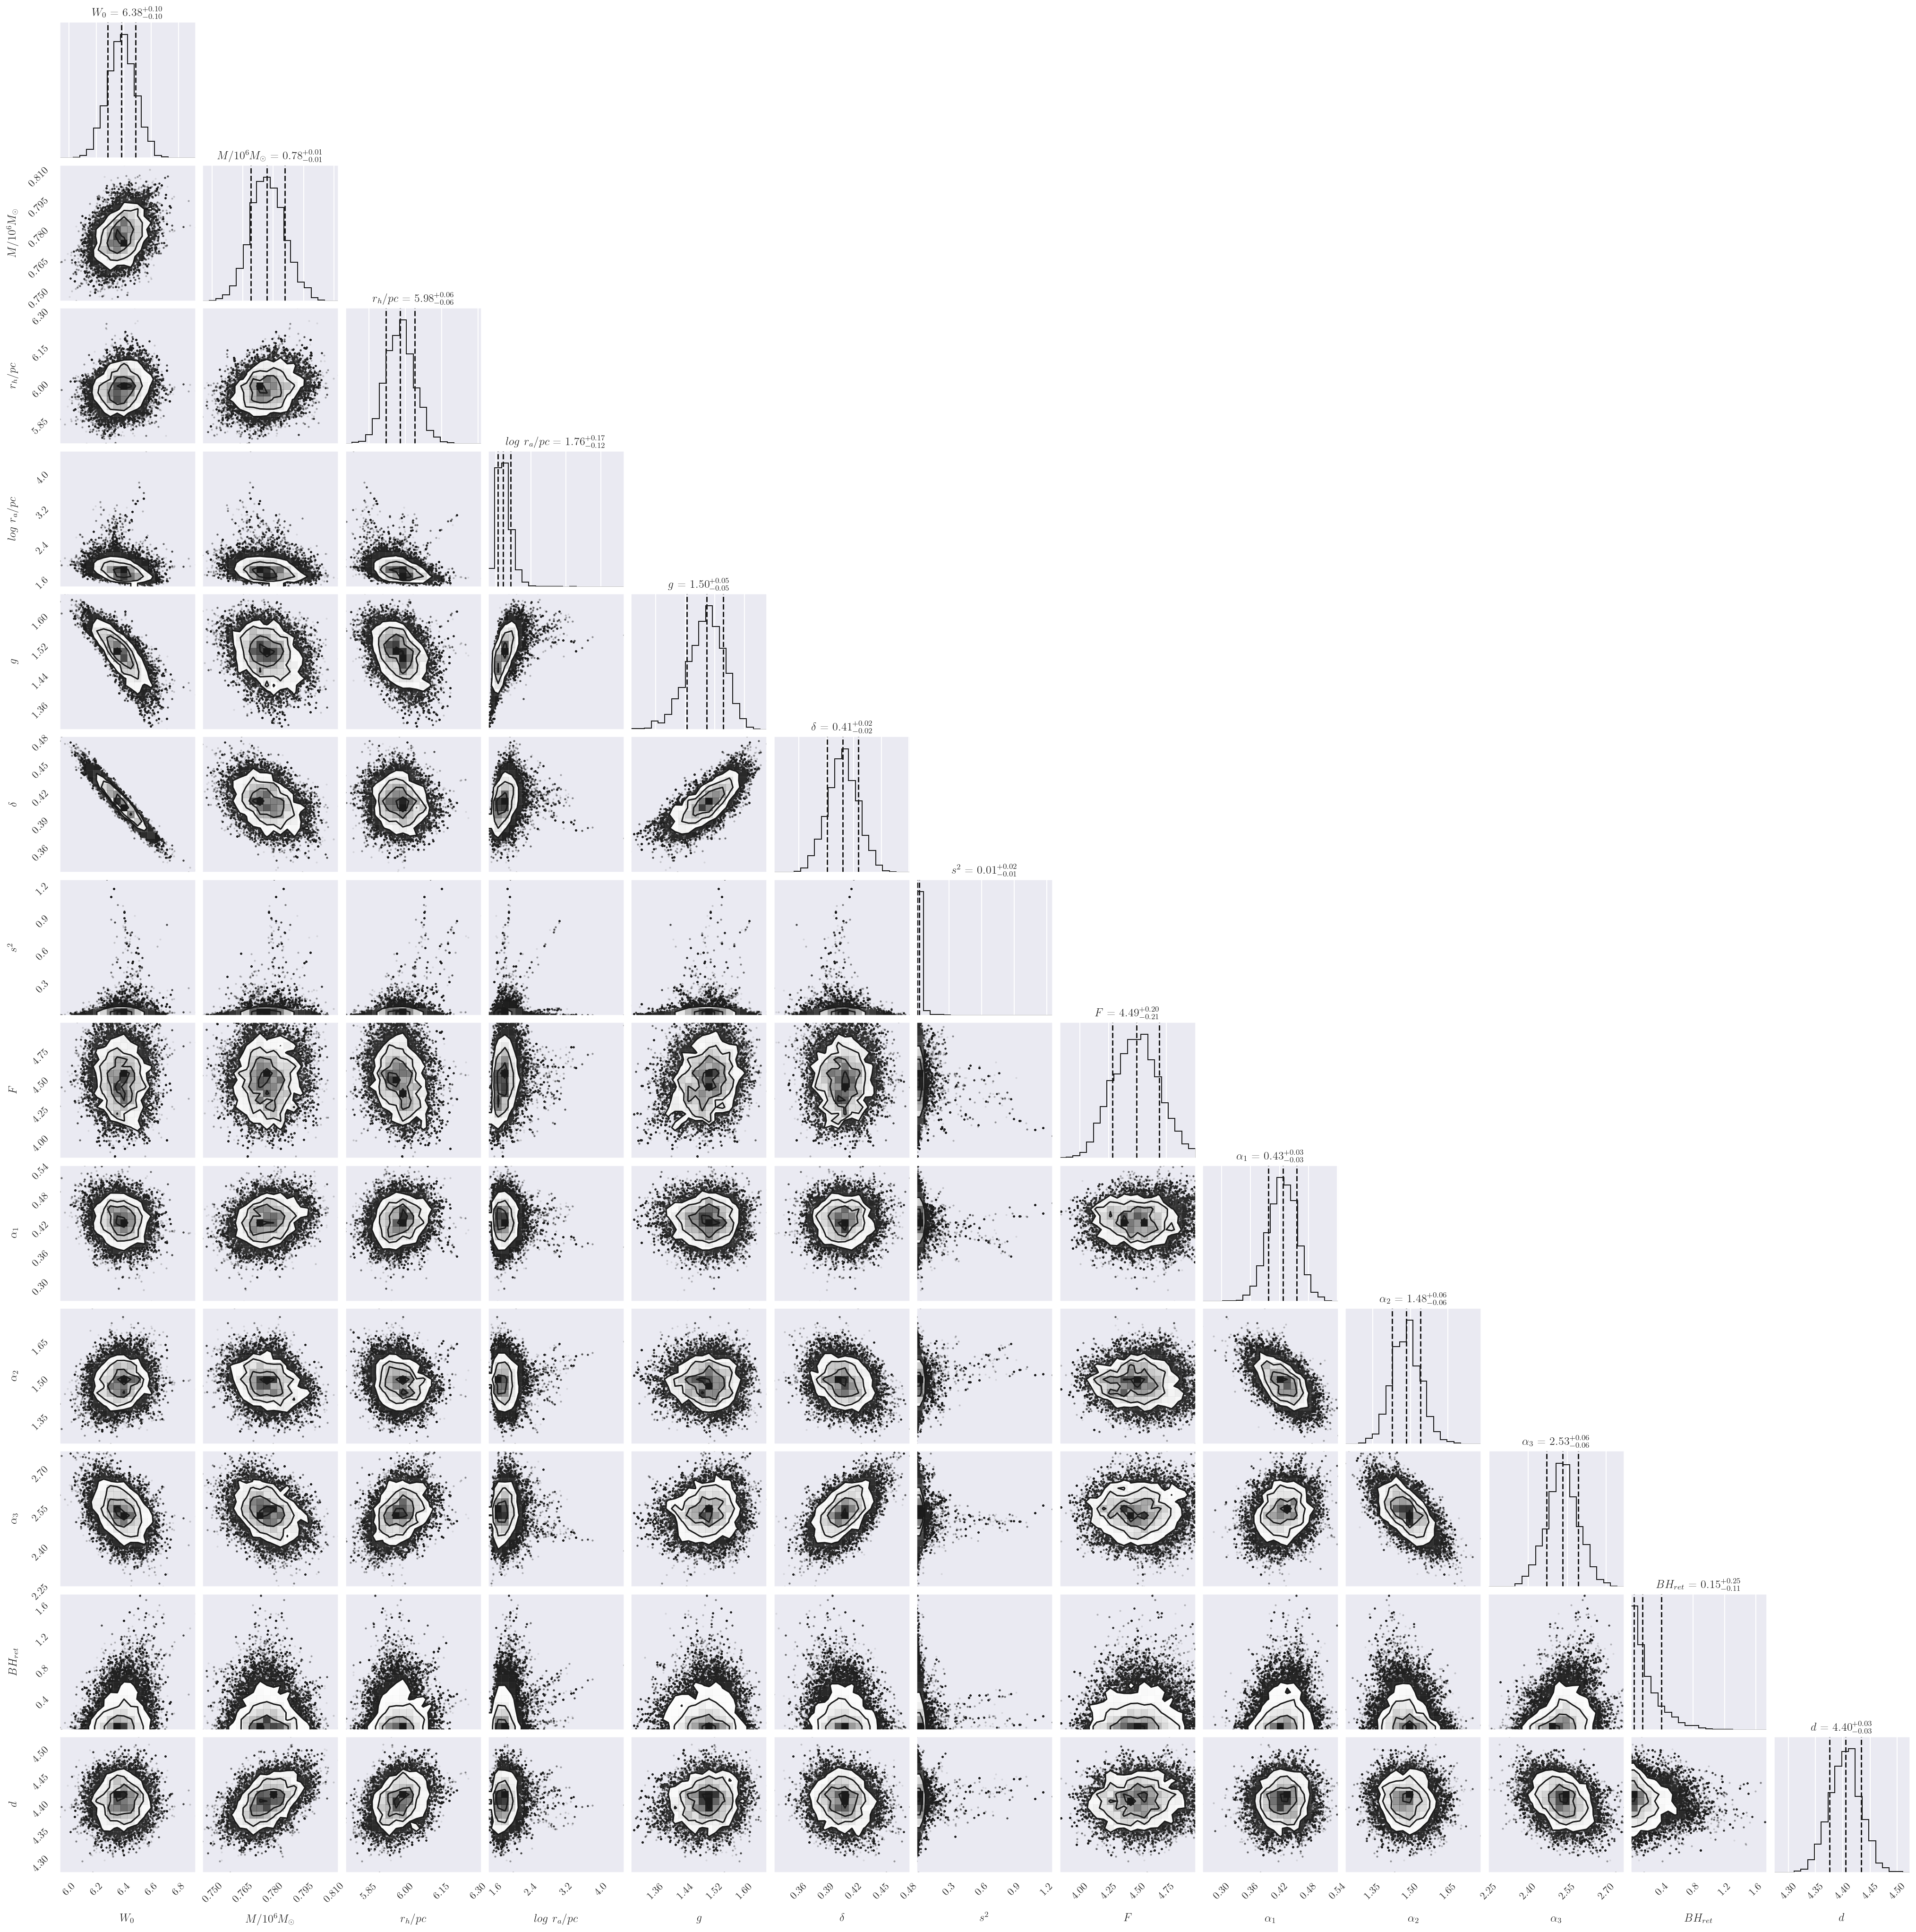

In [21]:
figure = corner(samples_flat, labels=[
    r"$W_{0}$",
    r"$M/10^6 M_{\odot}$",
    r"$r_h / pc$",
    r"$ log \ r_a / pc$",
    r"$g$",
    r"$\delta$",
    r"$s^2$",
    r"$F$",
    r"$\alpha_1$",
    r"$\alpha_2$",
    r"$\alpha_3$",
    r"$BH_{ret}$",
    r"$d$",
    r"$v_{esc}$",
],
   quantiles=[0.16, 0.5, 0.84],
   show_titles=True, title_kwargs={"fontsize": 12})
plt.savefig("corner.png",dpi=400)